In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [2]:
df1 = pd.read_csv("data/hospitalisation_details.csv")
df2 = pd.read_csv("data/medical_examinations.csv")

Hospitalisation Details:

- Customer ID
- year
- month
- date
- children: number of children
- charges: cost of insurance 
- Hospital tier: the tier of hospital ward that the plan provides for
- City tier: 
- State ID

Medical Examinations:

- Customer ID
- BMI
- HB1AC: Hemoglobin A1c, a measure of the average blood glucose (sugar) levels over the past 2 to 3 months
- Heart Issues: yes/no
- Any Transplants: yes/no
- Cancer history: yes/no
- NumberOfMajorSurgeries
- smoker: yes/no

In [3]:
df1.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    2343 non-null   object 
 1   year           2343 non-null   object 
 2   month          2343 non-null   object 
 3   date           2343 non-null   int64  
 4   children       2343 non-null   int64  
 5   charges        2343 non-null   float64
 6   Hospital tier  2343 non-null   object 
 7   City tier      2343 non-null   object 
 8   State ID       2343 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 164.9+ KB


In [5]:
df2.head()

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,34.485,11.87,yes,No,No,2,yes
3,Id4,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,35.530,5.45,No,No,No,No major surgery,yes


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   BMI                     2335 non-null   float64
 2   HBA1C                   2335 non-null   float64
 3   Heart Issues            2335 non-null   object 
 4   Any Transplants         2335 non-null   object 
 5   Cancer history          2335 non-null   object 
 6   NumberOfMajorSurgeries  2335 non-null   object 
 7   smoker                  2335 non-null   object 
dtypes: float64(2), object(6)
memory usage: 146.1+ KB


In [7]:
duplicate_rows1 = df1[df1.duplicated('Customer ID', keep=False)]
duplicate_rows1

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID
45,?,2004,Nov,6,0,1137.01,tier - 3,tier - 1,R1013
294,?,1999,Jun,9,1,2775.19,tier - 2,tier - 1,R1012
731,?,1985,Dec,20,2,6203.90,tier - 1,tier - 2,R1012
2129,?,2000,Oct,13,0,35585.58,tier - 1,tier - 2,R1011
2158,?,1992,Oct,6,0,36837.47,tier - 1,tier - 2,R1011
2202,?,1991,Nov,22,2,38711.00,tier - 1,tier - 3,R1011


In [8]:
duplicate_rows2 = df2[df2.duplicated('Customer ID', keep=False)]
duplicate_rows2

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker


In [9]:
merged_df = pd.merge(df1, df2, on='Customer ID', how='outer', indicator=True)

df1_only = merged_df[merged_df['_merge'] == 'left_only']
df2_only = merged_df[merged_df['_merge'] == 'right_only']

In [10]:
df1_only

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,_merge
45,?,2004,Nov,6,0,1137.01,tier - 3,tier - 1,R1013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
46,?,1999,Jun,9,1,2775.19,tier - 2,tier - 1,R1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
47,?,1985,Dec,20,2,6203.90,tier - 1,tier - 2,R1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
48,?,2000,Oct,13,0,35585.58,tier - 1,tier - 2,R1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
49,?,1992,Oct,6,0,36837.47,tier - 1,tier - 2,R1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
50,?,1991,Nov,22,2,38711.00,tier - 1,tier - 3,R1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1866,id2444,1987,Nov,27,2,20984.09,tier - 2,tier - 2,R1015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2101,id3444,2004,Nov,1,2,34303.17,tier - 1,tier - 3,R1013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [11]:
df2_only

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,_merge


There are 8 data points appearing in df1 but not df2, and none vice versa. Since these form a small minority of the overall dataset (<1%), and information in df2 is likely important, we can just ignore them by performing an inner join on "Customer ID" instead, and dropping the "Customer ID" column which is now unique.

In [12]:
df = pd.merge(df1, df2, on='Customer ID', how='inner')
df = df.drop(columns=["Customer ID"])


#### Check for any more occurences of "?"

In [13]:
df[df.eq('?').any(axis=1)]


,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
11,1999,Dec,26,0,700.00,?,tier - 3,R1013,22.240,5.04,No,No,No,No major surgery,No
13,2002,?,19,0,750.00,tier - 3,tier - 1,R1012,21.380,8.01,No,No,No,No major surgery,No
17,1996,?,18,0,770.38,tier - 3,?,R1012,18.820,5.51,yes,No,No,No major surgery,No
542,1995,Dec,1,3,4827.90,tier - 1,tier - 2,?,18.905,4.91,yes,No,No,1,No
1046,?,Jul,24,0,8534.67,tier - 2,tier - 3,R1024,24.320,11.56,yes,No,No,1,No
1049,?,Dec,12,1,8547.69,tier - 2,tier - 1,R1013,29.370,8.01,yes,No,No,1,No
1700,2004,Jul,17,0,15518.18,tier - 2,tier - 3,R1015,25.175,4.96,No,yes,No,1,?
1775,1994,Jul,1,3,17663.14,tier - 1,tier - 3,R1013,23.980,4.90,No,No,No,No major surgery,?
2165,2000,Sep,5,1,37165.16,tier - 1,tier - 3,?,37.620,6.32,yes,yes,No,2,yes
2332,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,34.485,11.87,yes,No,No,2,yes


There are actually 10 more rows with missing values. We can drop them as well, since these together with those that have been dropped previously are <1% of the total sample size.

In [14]:
df = df[~df.eq('?').any(axis=1)]
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)


In [15]:
from datetime import datetime

df['year'] = pd.to_numeric(df['year'], errors='coerce')
current_year = datetime.now().year
df['age'] = current_year - df['year']
df = df.drop(columns=['year', 'month', 'date'])



In [16]:
df.head()

,children,charges,Hospital_tier,City_tier,State_ID,BMI,HBA1C,Heart_Issues,Any_Transplants,Cancer_history,NumberOfMajorSurgeries,smoker,age
0,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,32
1,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,32
2,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,31
3,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,32
4,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,26


#### Children

<AxesSubplot:>

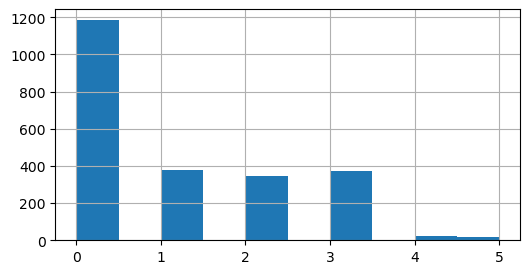

In [17]:
plt.figure(figsize=(6, 3))
df['children'].hist()

A majority of the sample does not have children, where the histogram is right skewed (as expected for such a variable).

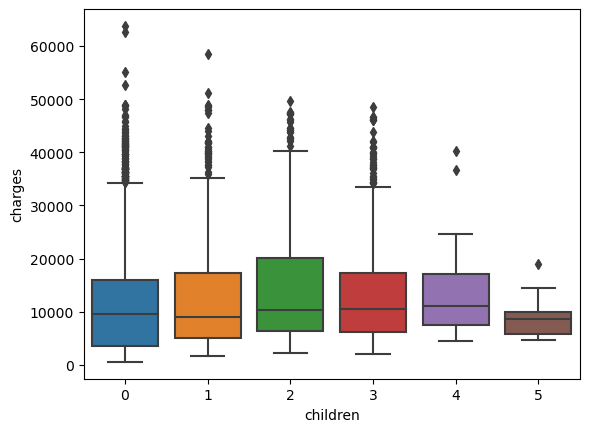

In [18]:
sns.boxplot(x='children', y='charges', data=df)
plt.show()

In [19]:
def anova(df, feature):
    formula = f'charges ~ C({feature})'

    model = ols(formula, data=df).fit()
    anova_table = sm.stats.anova_lm(model)

    print(anova_table)

In [20]:
anova(df, "children")

                 df        sum_sq       mean_sq         F    PR(>F)
C(children)     5.0  2.664412e+09  5.328824e+08  3.809106  0.001939
Residual     2319.0  3.244211e+11  1.398970e+08       NaN       NaN


An ANOVA test gives a p-value of ~0.001. We do not reject the null hypothesis and conclude that the variable "children" is statistically significant in determing the insurace cost.

#### Hospital Tier

<AxesSubplot:>

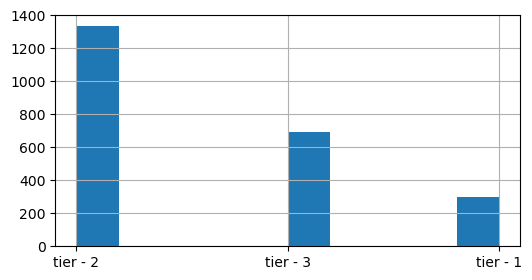

In [21]:
plt.figure(figsize=(6, 3))
df['Hospital_tier'].hist()

Most people opted for a tier-2 hospital plan, followed by the lowest tier-3, then a small minority ~10% for tier-1.

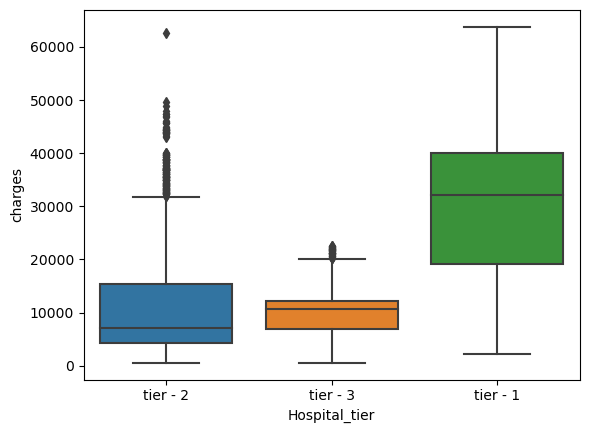

In [22]:
sns.boxplot(x='Hospital_tier', y='charges', data=df)
plt.show()

In [23]:
anova(df, "Hospital_tier")

                      df        sum_sq       mean_sq           F  \
C(Hospital_tier)     2.0  9.763011e+10  4.881505e+10  493.989566   
Residual          2322.0  2.294554e+11  9.881799e+07         NaN   

                         PR(>F)  
C(Hospital_tier)  1.773822e-179  
Residual                    NaN  


An ANOVA test gives a p-value of ~0, indicating that hopistal tier is statistically significant in determing the insurace cost.

#### City tier

<AxesSubplot:>

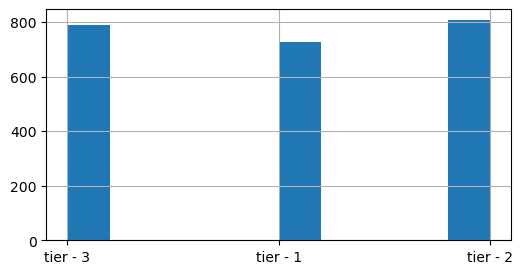

In [24]:
plt.figure(figsize=(6, 3))
df['City_tier'].hist()

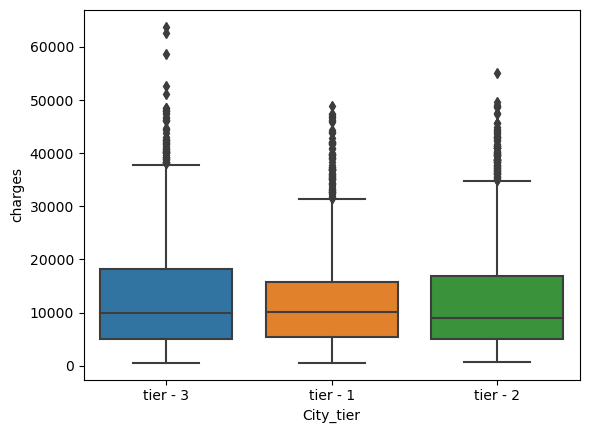

In [25]:
sns.boxplot(x='City_tier', y='charges', data=df)
plt.show()

In [26]:
anova(df, "City_tier")

                  df        sum_sq       mean_sq         F    PR(>F)
C(City_tier)     2.0  4.092192e+08  2.046096e+08  1.454356  0.233763
Residual      2322.0  3.266763e+11  1.406874e+08       NaN       NaN


Since the p-value is 0.266 > 0.05, there is insufficient evidence to reject the null hypothesis and we can 
conclude that city tier is not statistically significant in determining insurance cost. 

#### State ID

<AxesSubplot:>

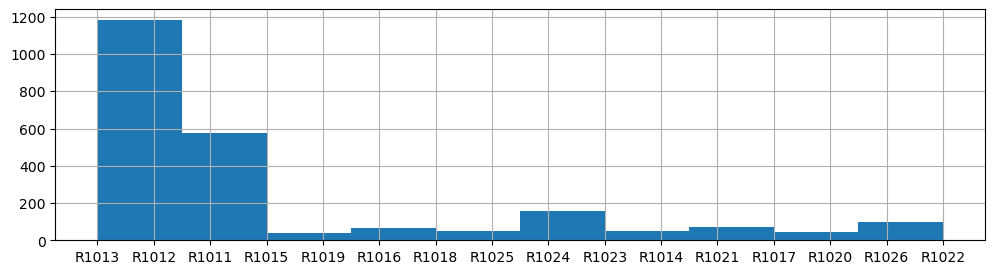

In [27]:
plt.figure(figsize=(12, 3))
df['State_ID'].hist()

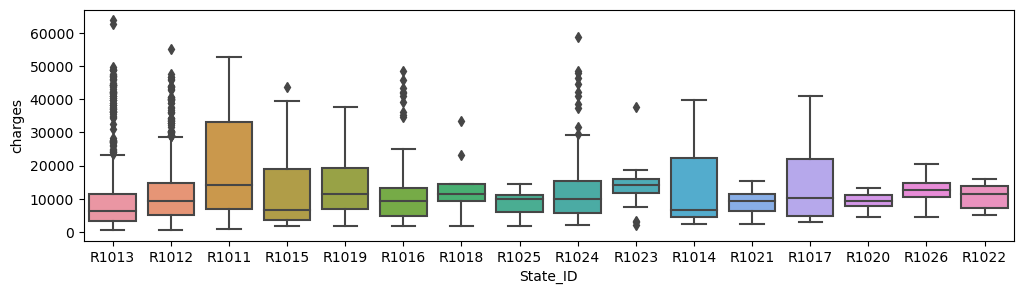

In [28]:
plt.figure(figsize=(12, 3))
sns.boxplot(x='State_ID', y='charges', data=df)
plt.show()

In [29]:
anova(df, "State_ID")

                 df        sum_sq       mean_sq          F        PR(>F)
C(State_ID)    15.0  2.994728e+10  1.996485e+09  15.514279  5.921822e-39
Residual     2309.0  2.971382e+11  1.286870e+08        NaN           NaN


Since the p-value is ~0, there is sufficient evidence to reject the null hypothesis, and we conclude that being from a diffrent state is statistically significant in determining insurance cost. 

#### Smoker

unique entries for smoker:  2


<AxesSubplot:>

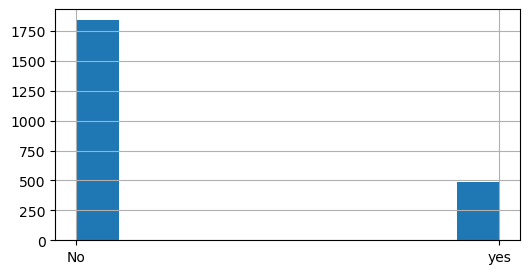

In [30]:
print("unique entries for smoker: ", df['smoker'].nunique())
plt.figure(figsize=(6, 3))
df['smoker'].hist()

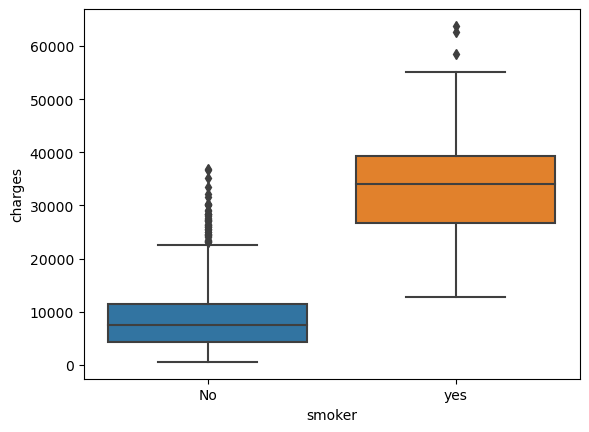

In [31]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.show()

A majority of the sample are non-smokers. Visual inspection of box-plots of insurance charges of smokers vs non-smokers indicate that this is a variable that significantly affects the insurance cost. 


In [32]:
anova(df, "State_ID")

                 df        sum_sq       mean_sq          F        PR(>F)
C(State_ID)    15.0  2.994728e+10  1.996485e+09  15.514279  5.921822e-39
Residual     2309.0  2.971382e+11  1.286870e+08        NaN           NaN


An ANOVA test gives a p-value of almost zero, indicating that the variable "smoker" is indeed statistically significant in determining the insurance cost.

#### BMI

<AxesSubplot:>

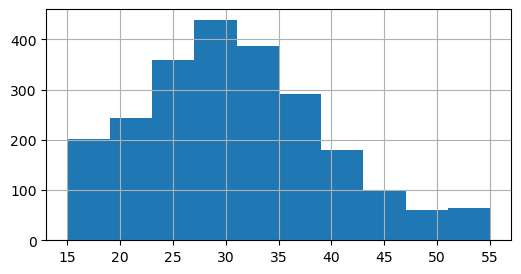

In [33]:
plt.figure(figsize=(6, 3))
df['BMI'].hist()

It is normally distributed with a slight skew.

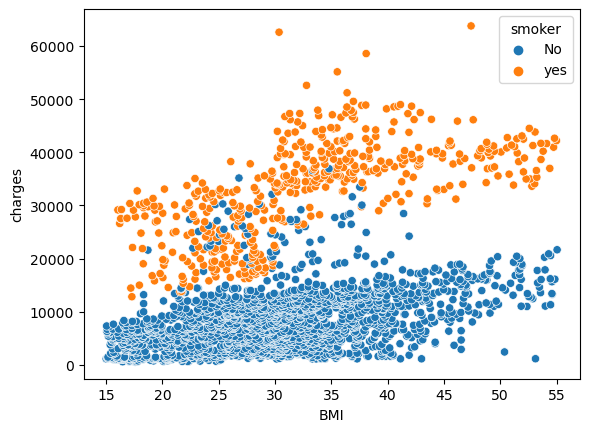

In [34]:
sns.scatterplot(x='BMI', y='charges', hue = "smoker", data=df)
plt.show()

For both smokers and non-smokers, there is a general slight positive correlation between BMI and insurance cost. 

#### Age

<AxesSubplot:>

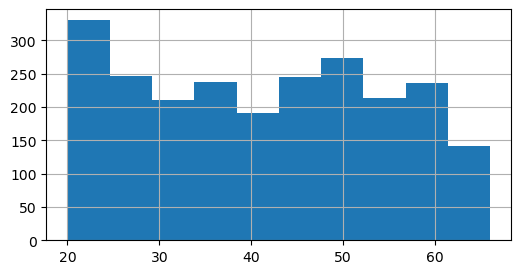

In [35]:
plt.figure(figsize=(6, 3))
df['age'].hist()

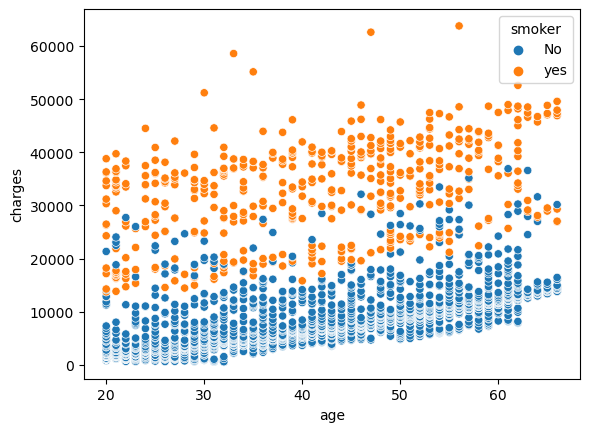

In [36]:
sns.scatterplot(x='age', y='charges', hue = "smoker", data=df)
plt.show()

Similar to BMI, there is a slight positive correlation between age and insurance cost for both smokers and non-smokers.

#### HBA1C

<AxesSubplot:>

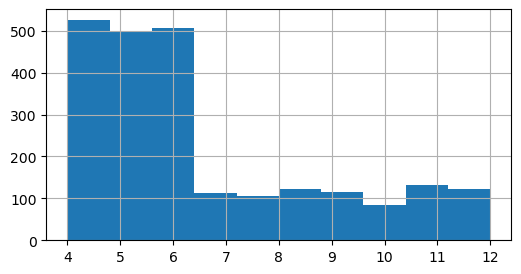

In [37]:
plt.figure(figsize=(6, 3))
df['HBA1C'].hist()

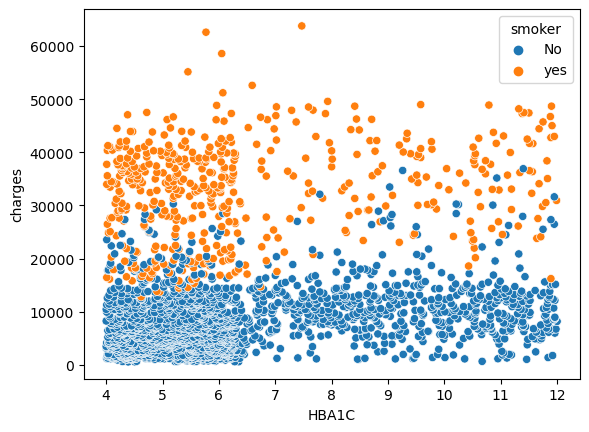

In [38]:
sns.scatterplot(x='HBA1C', y='charges', hue = "smoker", data=df)
plt.show()

HBA1C does not appear to have any correlation with insurance charges.

#### Heart Issues

<AxesSubplot:>

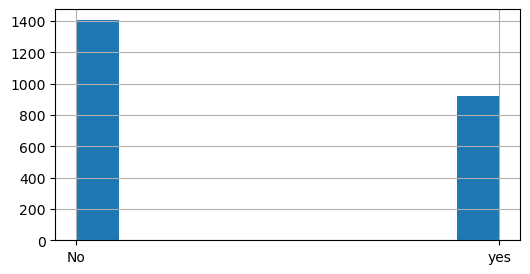

In [39]:
plt.figure(figsize=(6, 3))
df['Heart_Issues'].hist()

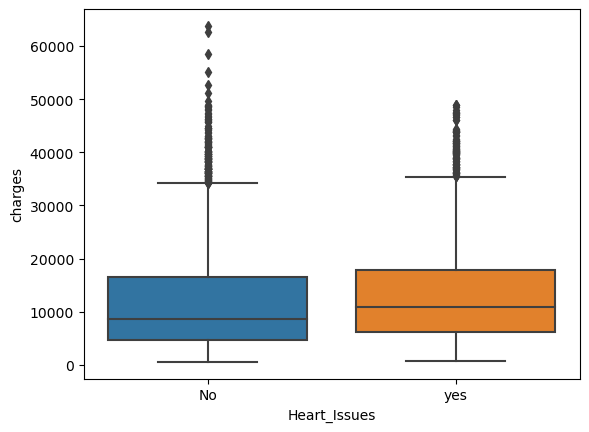

In [40]:
sns.boxplot(x='Heart_Issues', y='charges', data=df)
plt.show()

In [41]:
anova(df, "Heart_Issues")

                     df        sum_sq       mean_sq         F   PR(>F)
C(Heart_Issues)     1.0  7.949594e+08  7.949594e+08  5.659651  0.01744
Residual         2323.0  3.262905e+11  1.404608e+08       NaN      NaN


Since the p-value is 0.013<0.05, there is sufficient evidence to reject the null hypothesis, and we conclude that having heart issues is statistically significant in determining insurance cost. 

#### Transplants

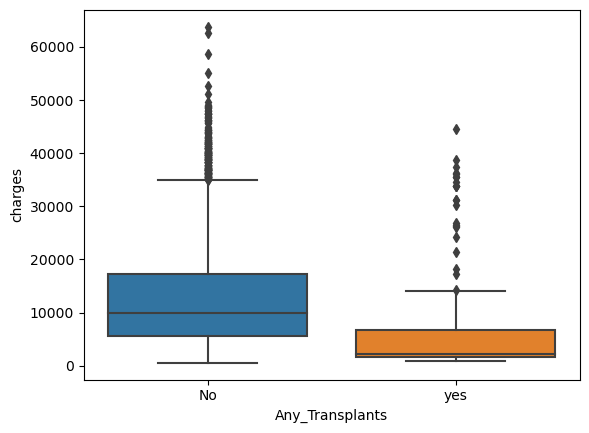

In [42]:
sns.boxplot(x='Any_Transplants', y='charges', data=df)
plt.show()

In [43]:
anova(df, "Any_Transplants")

                        df        sum_sq       mean_sq          F  \
C(Any_Transplants)     1.0  5.277912e+09  5.277912e+09  38.099138   
Residual            2323.0  3.218076e+11  1.385310e+08        NaN   

                          PR(>F)  
C(Any_Transplants)  7.910990e-10  
Residual                     NaN  


Since the p-value is ~0, there is sufficient evidence to reject the null hypothesis, and we conclude that having transplants is statistically significant in determining insurance cost. 

#### Cancer History

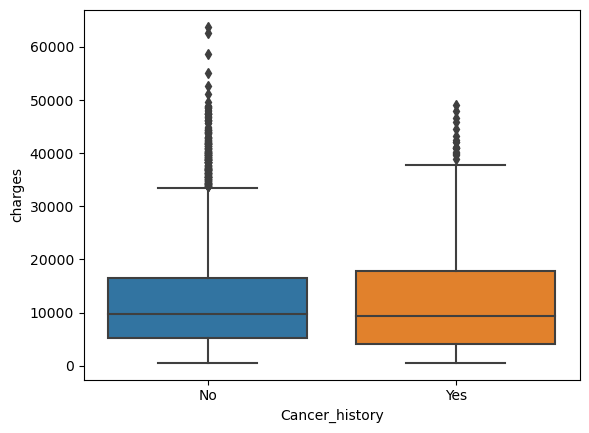

                       df        sum_sq       mean_sq         F    PR(>F)
C(Cancer_history)     1.0  1.659118e+08  1.659118e+08  1.178923  0.277688
Residual           2323.0  3.269196e+11  1.407316e+08       NaN       NaN


In [44]:
sns.boxplot(x='Cancer_history', y='charges', data=df)
plt.show()

anova(df, "Cancer_history")

Since the p-value is 0.27>0.05, we do not reject the null hypothesis, and we conclude that having a history of cancer is statistically insignificant in determining insurance cost. 

#### Number of major surgeries

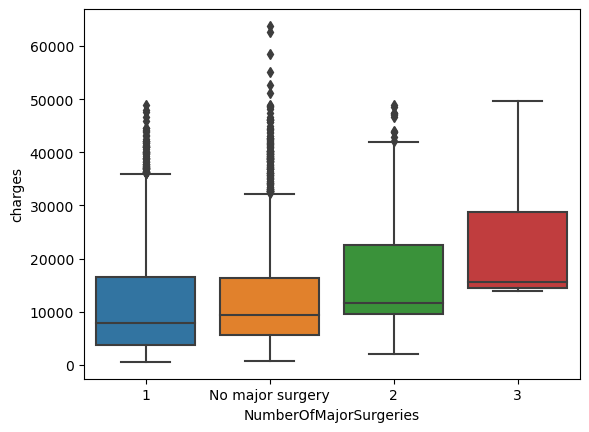

                               df        sum_sq       mean_sq         F  \
C(NumberOfMajorSurgeries)     3.0  6.305215e+09  2.101738e+09  15.20709   
Residual                   2321.0  3.207803e+11  1.382078e+08       NaN   

                                 PR(>F)  
C(NumberOfMajorSurgeries)  8.437711e-10  
Residual                            NaN  


In [45]:
sns.boxplot(x='NumberOfMajorSurgeries', y='charges', data=df)
plt.show()

anova(df, "NumberOfMajorSurgeries")

Since the p-value is ~0, we reject the null hypothesis, and we conclude that having different prior major surgeries is statistically significant in determining insurance cost. 

### Cleaning data

In [46]:
def clean_tier(entry):
    return int(entry[-1])

In [47]:
df['Hospital_tier'] = df['Hospital_tier'].apply(clean_tier)
df['City_tier'] = df['City_tier'].apply(clean_tier)


In [48]:
df['NumberOfMajorSurgeries']

0                      1
1                      1
2                      1
3                      1
4                      1
              ...       
2329    No major surgery
2330    No major surgery
2331    No major surgery
2333    No major surgery
2334    No major surgery
Name: NumberOfMajorSurgeries, Length: 2325, dtype: object

In [49]:
df['NumberOfMajorSurgeries'] = df['NumberOfMajorSurgeries'].replace('No major surgery', 0)
df['NumberOfMajorSurgeries']

0       1
1       1
2       1
3       1
4       1
       ..
2329    0
2330    0
2331    0
2333    0
2334    0
Name: NumberOfMajorSurgeries, Length: 2325, dtype: object

In [50]:
df['NumberOfMajorSurgeries'] = pd.to_numeric(df['NumberOfMajorSurgeries'], errors='coerce')
df['NumberOfMajorSurgeries']

0       1
1       1
2       1
3       1
4       1
       ..
2329    0
2330    0
2331    0
2333    0
2334    0
Name: NumberOfMajorSurgeries, Length: 2325, dtype: int64

In [51]:
df.isna().sum()

children                  0
charges                   0
Hospital_tier             0
City_tier                 0
State_ID                  0
BMI                       0
HBA1C                     0
Heart_Issues              0
Any_Transplants           0
Cancer_history            0
NumberOfMajorSurgeries    0
smoker                    0
age                       0
dtype: int64

In [52]:
df['NumberOfMajorSurgeries'] = pd.to_numeric(df['NumberOfMajorSurgeries'], errors='coerce')
df['NumberOfMajorSurgeries'] = df['NumberOfMajorSurgeries'].replace('No major surgery', 0)

In [53]:
def one_hot(df, drop_first=True):
    
    obj_col = df.select_dtypes(include=['object']).columns.tolist()

    for col in obj_col:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col, drop_first=drop_first)], axis=1)
        df = df.drop(col, axis=1)

    return df

In [54]:
df = one_hot(df)

In [55]:
df.head(100)

,children,charges,Hospital_tier,City_tier,BMI,HBA1C,NumberOfMajorSurgeries,age,State_ID_R1012,State_ID_R1013,...,State_ID_R1021,State_ID_R1022,State_ID_R1023,State_ID_R1024,State_ID_R1025,State_ID_R1026,Heart_Issues_yes,Any_Transplants_yes,Cancer_history_Yes,smoker_yes
0,0,563.84,2,3,17.58,4.51,1,32,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,570.62,2,1,17.60,4.39,1,32,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,600.00,2,1,16.47,6.35,1,31,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,604.54,3,3,17.70,6.28,1,32,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,637.26,3,3,22.34,5.57,1,26,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,1391.53,2,1,33.33,9.79,0,22,0,1,...,0,0,0,0,0,0,0,0,0,0
99,0,1400.44,2,2,24.59,4.38,1,26,0,1,...,0,0,0,0,0,0,0,0,0,0
100,0,1402.00,2,3,15.41,5.43,1,27,0,0,...,0,0,0,0,0,0,1,0,1,0
101,0,1417.00,2,3,16.50,4.11,0,28,0,1,...,0,0,0,0,0,0,1,0,0,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2334
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   children                2325 non-null   int64  
 1   charges                 2325 non-null   float64
 2   Hospital_tier           2325 non-null   int64  
 3   City_tier               2325 non-null   int64  
 4   BMI                     2325 non-null   float64
 5   HBA1C                   2325 non-null   float64
 6   NumberOfMajorSurgeries  2325 non-null   int64  
 7   age                     2325 non-null   int64  
 8   State_ID_R1012          2325 non-null   uint8  
 9   State_ID_R1013          2325 non-null   uint8  
 10  State_ID_R1014          2325 non-null   uint8  
 11  State_ID_R1015          2325 non-null   uint8  
 12  State_ID_R1016          2325 non-null   uint8  
 13  State_ID_R1017          2325 non-null   uint8  
 14  State_ID_R1018          2325 non-null   

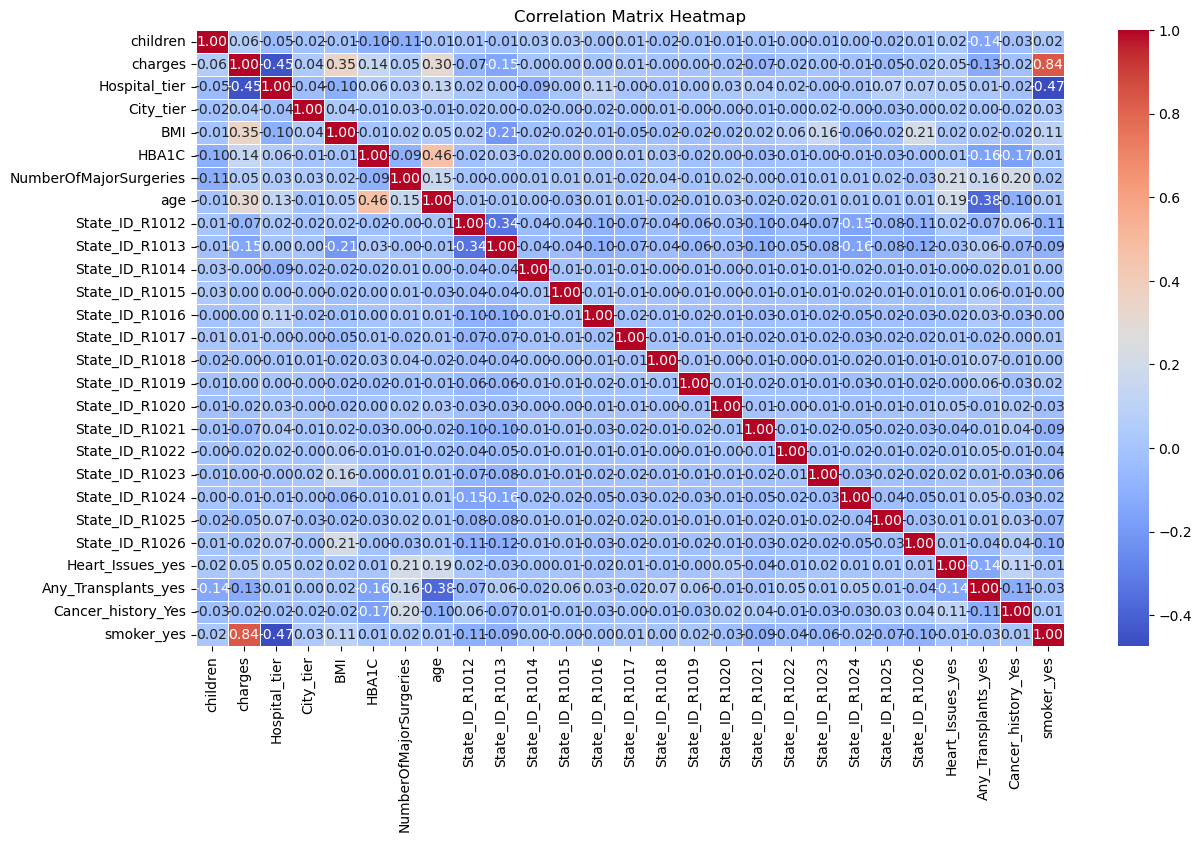

In [57]:
correlation_matrix = df.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Observations from EDA

- A majority of the sample does not have children, and the distribution is right skewed (as expected for such a variable). The number of children the customer has is statistically significant in determing the insurace cost.
- Hopistal tier, being from a diffrent state, being a smoker, having heart issue, having transplants and having different numebrs of prior major surgeries is statistically significant in determing the insurace cost.
- City tier, having a history of cancer is not statistically significant in determining insurance cost. 
- There is a positive correlation of BMI and Age to the insurance cost across the two categories of whether or not the customer is a smoker.
- HBA1C does not appear to have any correlation with insurance charges.
- Based on the correlation matrix, in order, whether or not a customer is a smoker, the hospital tier and BMI are the most significant factors influencing insurance cost. 